**Data Extraction and Preparation and Visualization Libraries**

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go  
import plotly.tools as tls  
import plotly.figure_factory as ff  
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

#Extract the data from train.csv into Xy_train
data = pd.read_csv('Telco-Customer-Churn.csv', engine='python')

# Find and Remove all the data with empty string 
data.replace(' ', np.nan, inplace=True)
data.isnull().sum() # TotalCharges - 11
data = data.dropna()


**CHURN DISTRIBUTTION FOR OBSERVATION**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



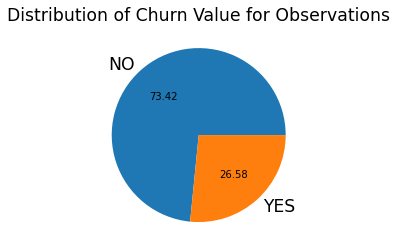

In [0]:
#values
val = data["Churn"].value_counts().values.tolist()

labels = ["NO", "YES"]

plt.pie(val, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.title("Distribution of Churn Value for Observations")
plt.show()


**CORRELATIONS BETWEEN NUMERIC FEATURES**

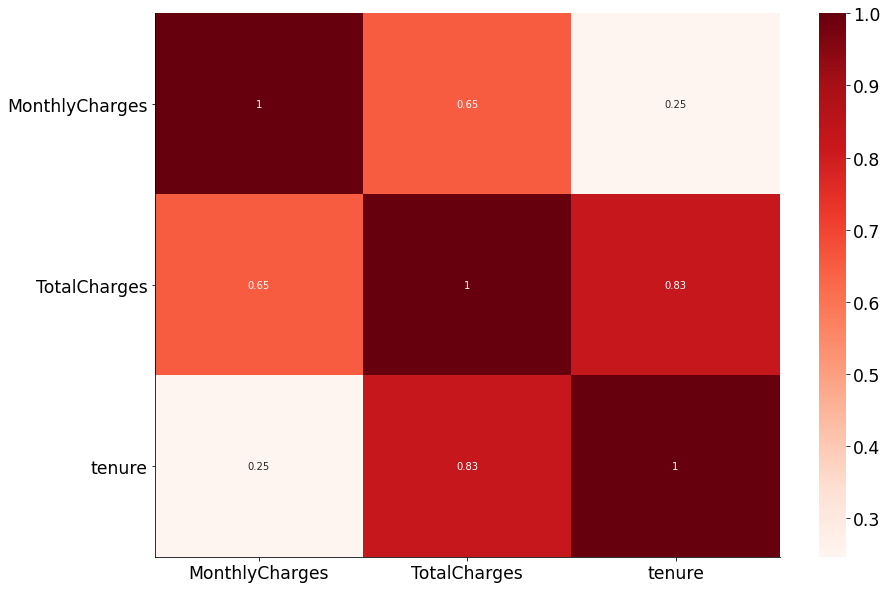

In [91]:
numeric_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')

numeric = data[[*numeric_features]]

#print(data['tenure'])

corr = numeric.corr()
g = sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
sns.despine()
g.figure.set_size_inches(14,10)

# To rotate the x-axis label 
plt.xticks(rotation=0)
    
plt.show()

**RELATIONSHIP CHURN AND NUMERIC FEATURES**

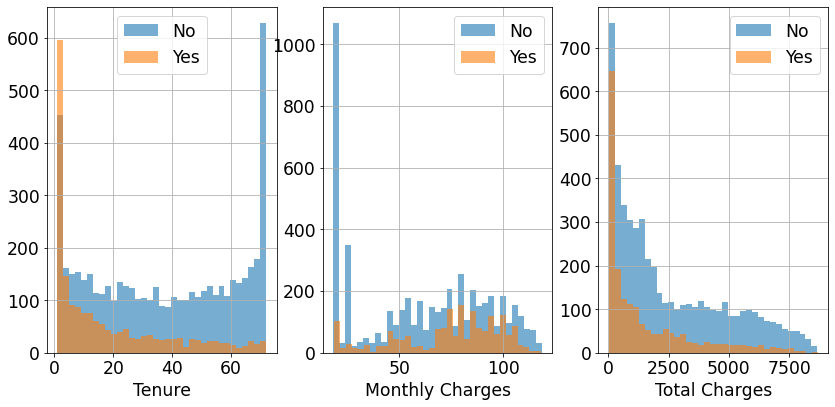

In [102]:
plt.figure(figsize=(14, 14))

plt.subplot(2, 3, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Yes')
plt.legend()
plt.xlabel('Tenure')

plt.subplot(2, 3, 2)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Yes')
plt.xlabel('Monthly Charges')
plt.legend()

plt.subplot(2, 3, 3)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Yes')
plt.xlabel('Total Charges')
plt.legend()

**RELATIONSHIP CHURN AND CATEGORICAL FEATURES - FIGURE 3**

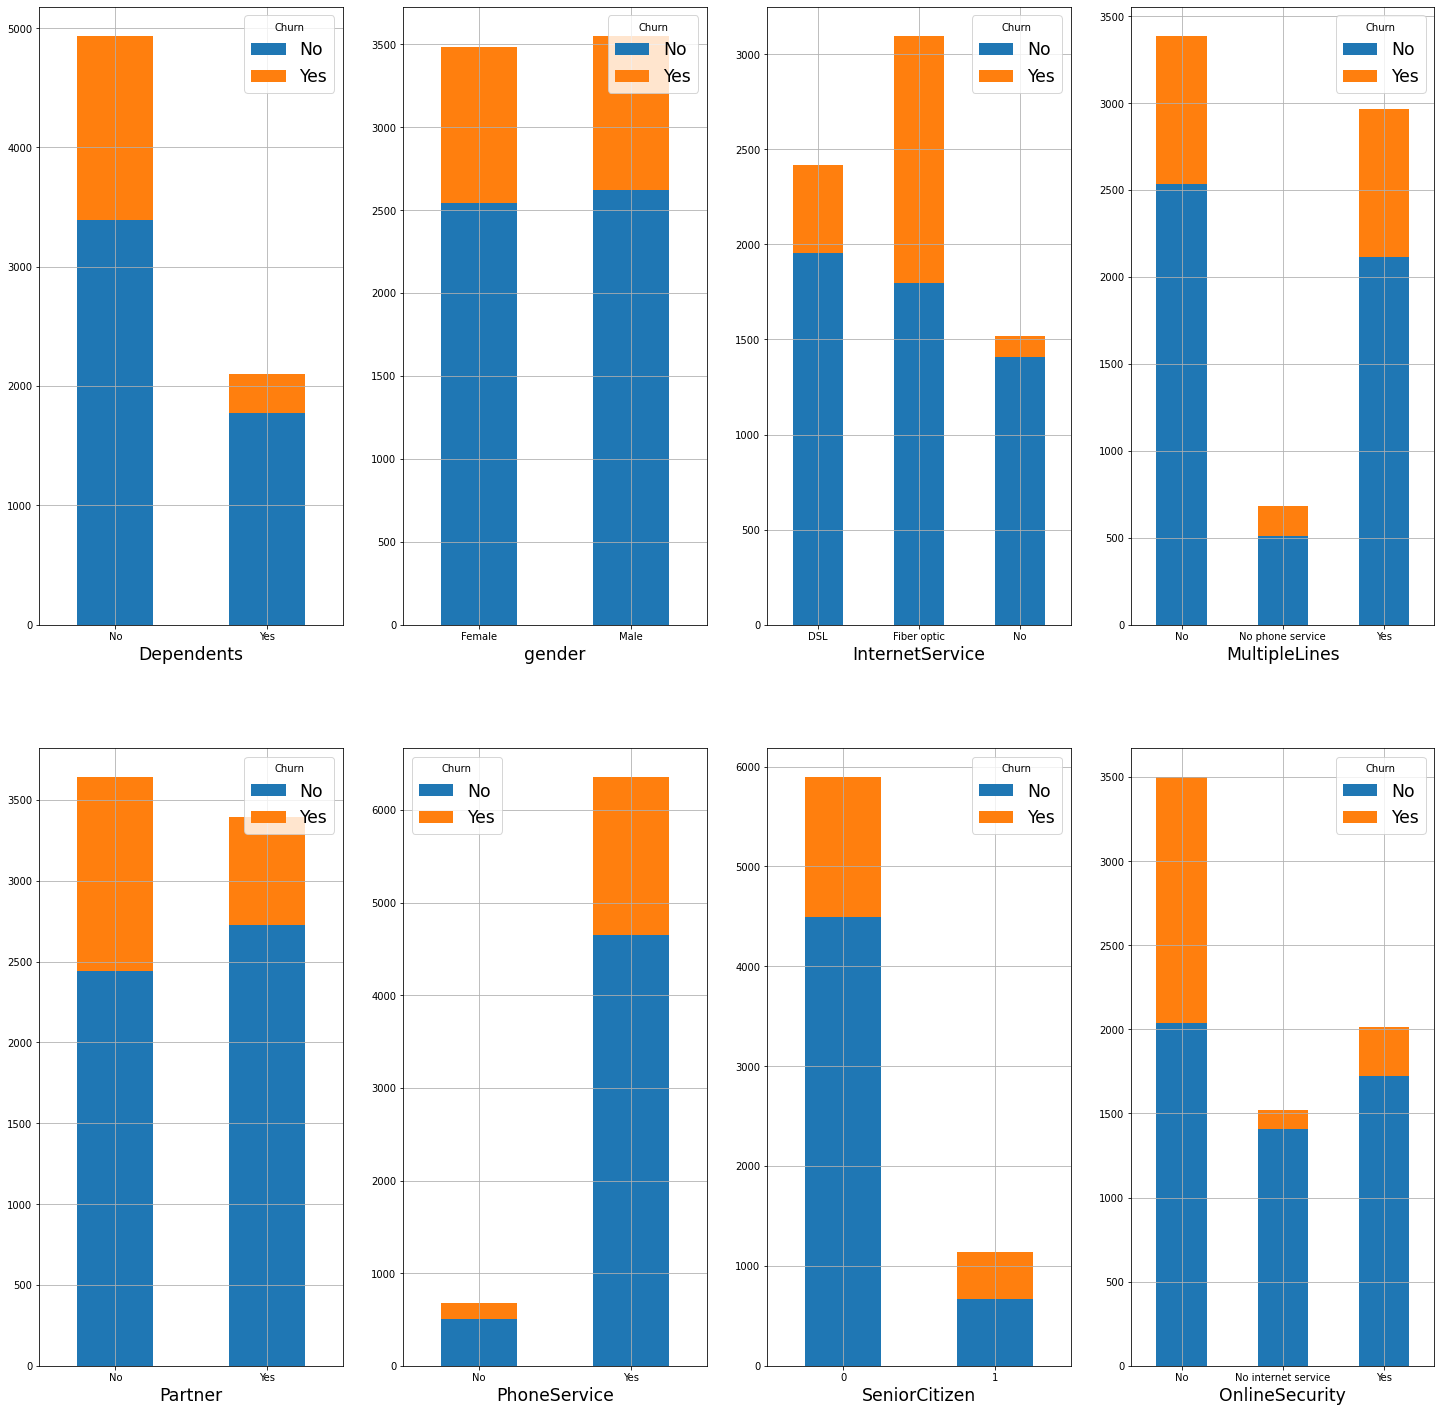

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(25)
fig.set_figwidth(25)

# GENDER
Gender = pd.crosstab(index=data["gender"], 
                          columns=data["Churn"])

Gender.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[0,1],
             stacked=True)

# SENIOR CITIZEN
Senior = pd.crosstab(index=data["SeniorCitizen"], 
                          columns=data["Churn"])

Senior.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                 fontsize = 10,
                 ax=axes[1,2],
                 stacked=True)


# PARTNER
Partner = pd.crosstab(index=data["Partner"], 
                          columns=data["Churn"])

Partner.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[1,0],
                 stacked=True)

# DEPENDENTS
Dependents = pd.crosstab(index=data["Dependents"], 
                          columns=data["Churn"])

Dependents.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[0,0],
                 stacked=True)


# PHONE SERVICE
PhoneService = pd.crosstab(index=data["PhoneService"], 
                          columns=data["Churn"])

PhoneService.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[1,1],
                 stacked=True)

# MULTIPLE LINES
MultipleLines = pd.crosstab(index=data["MultipleLines"], 
                          columns=data["Churn"])

MultipleLines.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[0,3],
                 stacked=True)               

# INTERNET SERVICE
InternetService = pd.crosstab(index=data["InternetService"], 
                          columns=data["Churn"])

InternetService.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[0,2],
                 stacked=True)


# ONLINE SECURITY
OnlineSecurity = pd.crosstab(index=data["OnlineSecurity"], 
                          columns=data["Churn"])

OnlineSecurity.plot(kind="bar", 
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[1,3],
                 stacked=True)

**RELATIONSHIP CHURN AND CATEGORICAL FEATURES - FIGURE 4**

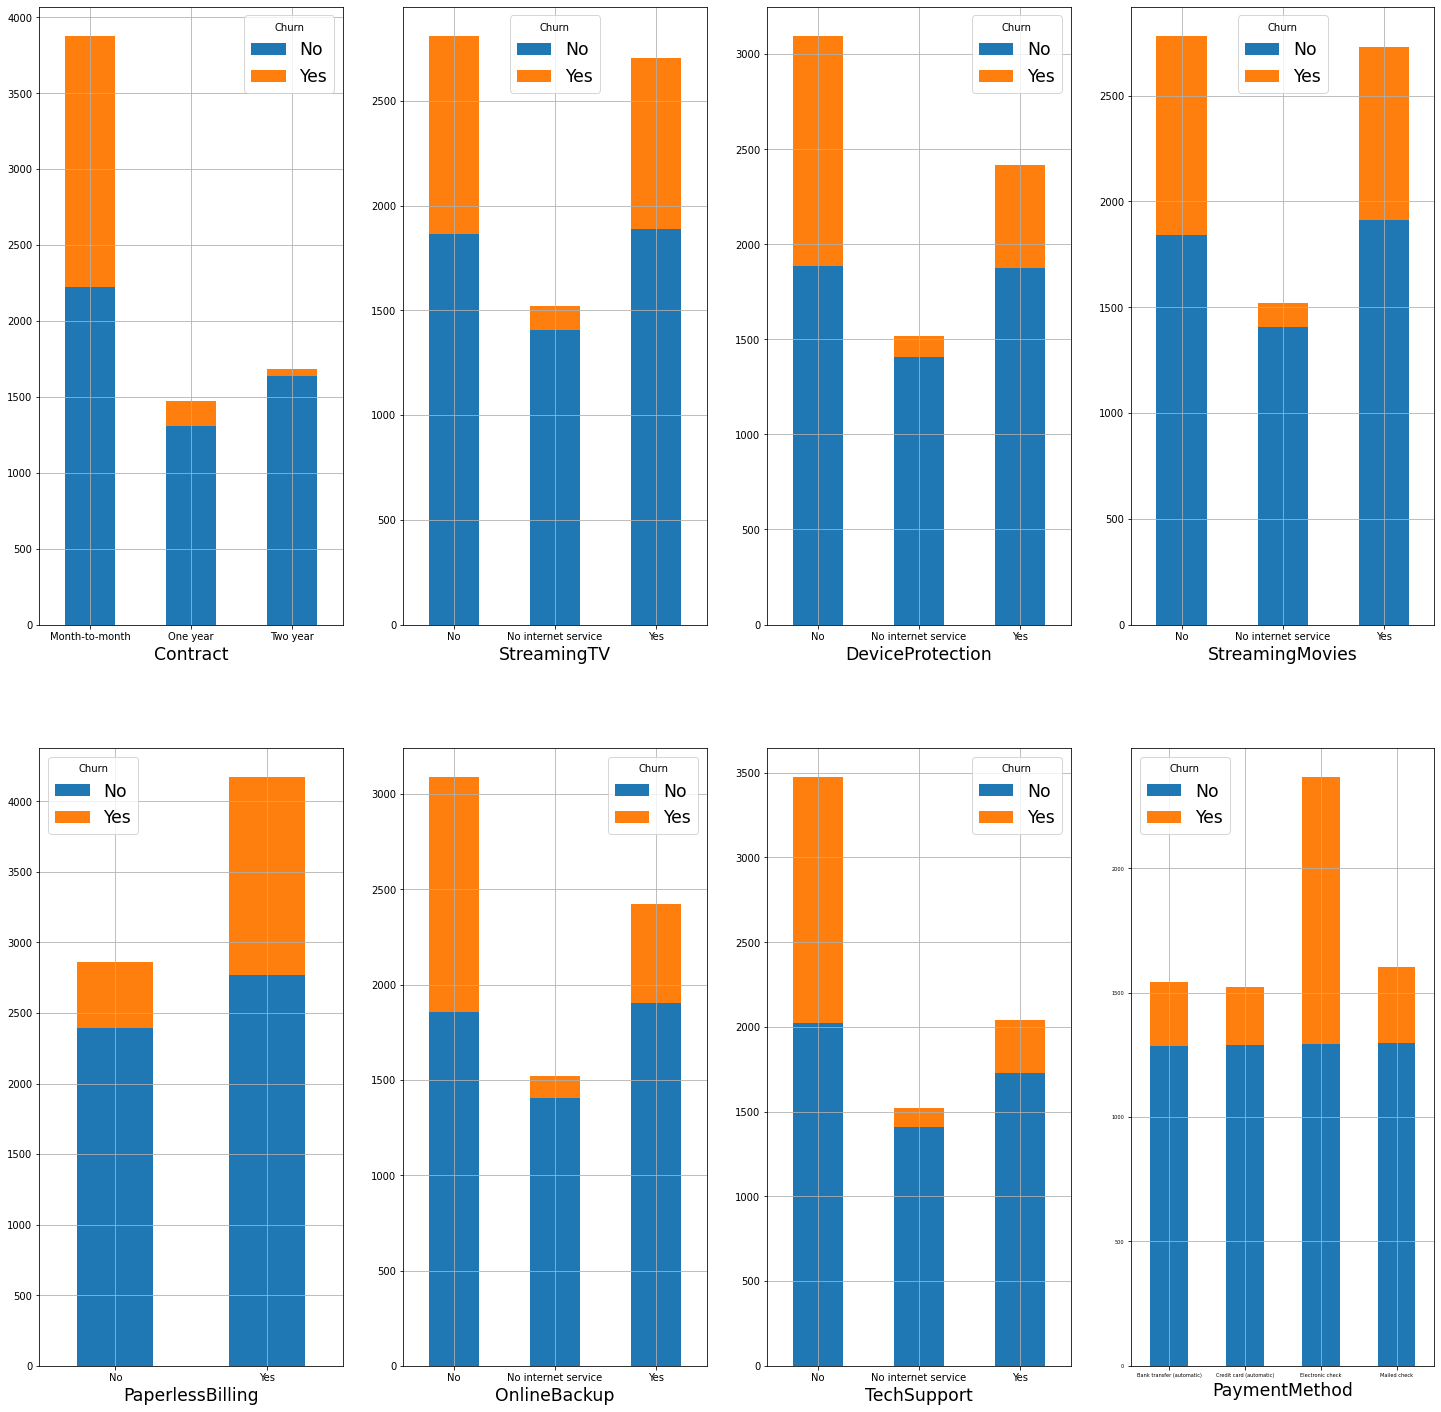

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(25)
fig.set_figwidth(25)

# OnlineBackup
OnlineBackup = pd.crosstab(index=data["OnlineBackup"], 
                          columns=data["Churn"])

OnlineBackup.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 grid = 1,
                fontsize = 10,
                 ax=axes[1,1]
              )
# DeviceProtection
DeviceProtection = pd.crosstab(index=data["DeviceProtection"], 
                          columns=data["Churn"])

DeviceProtection.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 ax=axes[0,2],
                 fontsize = 10,
                 grid = 1
              )

# TechSupport
TechSupport = pd.crosstab(index=data["TechSupport"], 
                          columns=data["Churn"])

TechSupport.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 10,
                 ax=axes[1,2],
                 grid = 1
              )


# StreamingTV
StreamingTV = pd.crosstab(index=data["StreamingTV"], 
                          columns=data["Churn"])

StreamingTV.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 10,
                 ax=axes[0,1],
                 grid = 1
              )

# StreamingMovies
StreamingMovies = pd.crosstab(index=data["StreamingMovies"], 
                          columns=data["Churn"])

StreamingMovies.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 10,
                 ax=axes[0,3],
                 grid = 1
              )

# Contract
Contract = pd.crosstab(index=data["Contract"], 
                          columns=data["Churn"])

Contract.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 10,
                 ax=axes[0,0],
                 grid = 1
              )

# PaperlessBilling
PaperlessBilling = pd.crosstab(index=data["PaperlessBilling"], 
                          columns=data["Churn"])

PaperlessBilling.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 10,
                 ax=axes[1,0],
                 grid = 1
              )

# PaymentMethod
PaymentMethod = pd.crosstab(index=data["PaymentMethod"], 
                          columns=data["Churn"])

PaymentMethod.plot(kind="bar", 
                 stacked=True,
                 rot=0,
                 fontsize = 5,
                 ax=axes[1,3],
                 grid = 1
              )